<a href="https://colab.research.google.com/github/Kratugautam99/Coastal-Aid/blob/main/SmartIndiaHackathonMLModelFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('BeachDatasetFinal.csv')
df = df.drop(columns=['Sr.No.(Int)','Date(dd-mm-yyyy)','Zonal Current(Metre/Second)'])
df

,Humidity(Percent),Temperature(Celsius),Wave Height(Metre),Target(Safe/Unsafe)
0,56,28.09461,4.087691,Unsafe
1,57,28.09745,4.540046,Unsafe
2,57,28.06171,3.698761,Safe
3,58,28.04301,4.098092,Unsafe
4,59,28.01005,2.347430,Safe
...,...,...,...,...
226,92,29.30938,1.945767,Safe
227,94,29.47811,4.421018,Unsafe
228,86,29.51821,1.020786,Safe
229,94,29.42433,2.441287,Safe


In [3]:
x_train,x_test,y_train,y_test = train_test_split(df[['Humidity(Percent)','Temperature(Celsius)','Wave Height(Metre)']],df['Target(Safe/Unsafe)'],test_size=0.2,random_state=1)
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing' : [0,1,None]
        }
    },
    'BernoulliNB': {
        'model': BernoulliNB(),
        'params': {
            'alpha' : [0,0.5,1,None],
            'fit_prior' : [True,False],
            'binarize' : [0,1,None]
        }
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params': {
            'alpha' : [0,0.5,1,None],
            'fit_prior' : [True,False],
            'class_prior' : [None]
        }
    }

}
scores = []
for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1 = df1.sort_values(by='best_score',ascending=False)
df1.style.hide(axis='index')

model,best_score,best_params
random_forest,1.000000,{'n_estimators': 10}
decision_tree,1.000000,{'criterion': 'gini'}
svm,0.994595,"{'kernel': 'linear', 'C': 20}"
logistic_regression,0.983634,{'C': 5}
GaussianNB,0.983634,{'var_smoothing': 0}
MultinomialNB,0.864565,"{'fit_prior': False, 'class_prior': None, 'alpha': 1}"
BernoulliNB,0.722823,"{'fit_prior': True, 'binarize': 1, 'alpha': 0.5}"


In [4]:
scaler = StandardScaler()
scaler.fit(df[['Humidity(Percent)','Temperature(Celsius)','Wave Height(Metre)']])
df[['Humidity(Percent)','Temperature(Celsius)','Wave Height(Metre)']] = scaler.transform(df[['Humidity(Percent)','Temperature(Celsius)','Wave Height(Metre)']])
SSE = []
k_range = range(1,len(df[['Humidity(Percent)','Temperature(Celsius)','Wave Height(Metre)']]))
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['Humidity(Percent)','Temperature(Celsius)','Wave Height(Metre)']])
  SSE.append(km.inertia_)

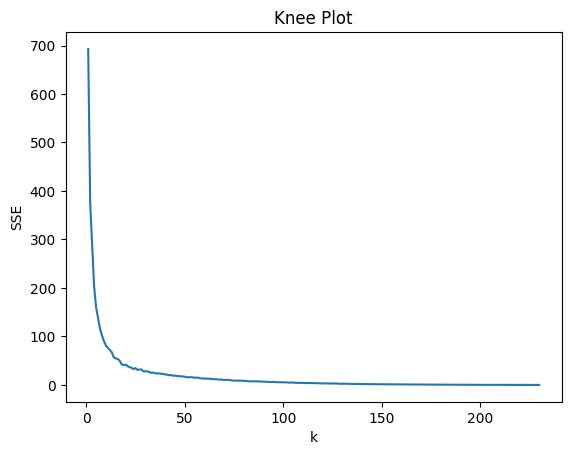

In [5]:
plt.title('Knee Plot')
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_range,SSE);

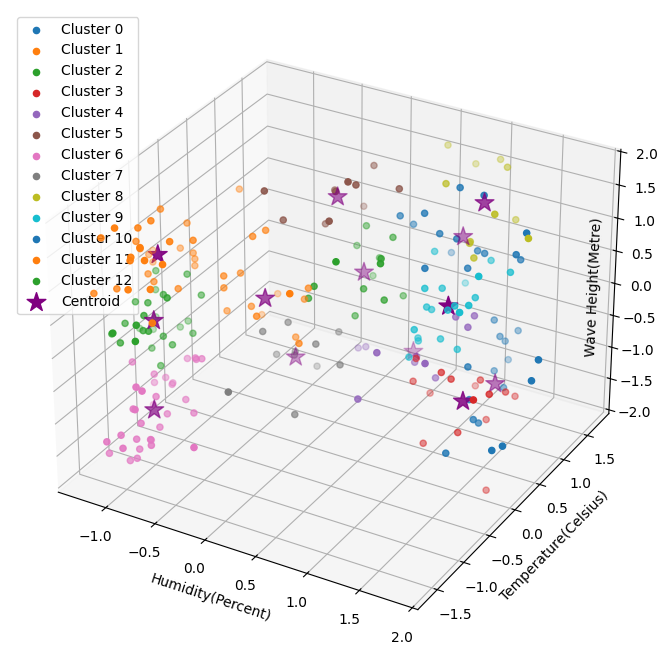

In [6]:
km = KMeans(n_clusters=13)
df['Cluster'] = km.fit_predict(df[['Humidity(Percent)', 'Temperature(Celsius)', 'Wave Height(Metre)']])
fig = plt.figure(figsize=(12, 8),facecolor='white')
ax = fig.add_subplot(111, projection='3d')
for i in range(13):
    dfk = df[df.Cluster == i]
    ax.scatter(dfk['Humidity(Percent)'], dfk['Temperature(Celsius)'], dfk['Wave Height(Metre)'], label=f'Cluster {i}')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], color='purple', marker='*', s=200, label='Centroid')
ax.set_xlabel('Humidity(Percent)')
ax.set_ylabel('Temperature(Celsius)')
ax.set_zlabel('Wave Height(Metre)', labelpad = -30)
plt.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.1)
plt.legend(loc='upper left')
plt.show()

In [7]:
std = StandardScaler()
pca = PCA(n_components=3)
x_train = std.fit_transform(x_train)
x_train = pca.fit_transform(x_train)
print(df)
m11 = LogisticRegression()
m12 = RandomForestClassifier()
m13 = SVC()
m11.fit(x_train,y_train)
m12.fit(x_train,y_train)
m13.fit(x_train,y_train)
print(f'''m11.score => {m11.score(x_train,y_train)}
m12.score => {m12.score(x_train,y_train)}
m13.score => {m13.score(x_train,y_train)}''')
print(m11.predict([[1.67,0.155,10]]))

     Humidity(Percent)  Temperature(Celsius)  Wave Height(Metre)  \
0            -0.969303             -0.531042            0.960108   
1            -0.895722             -0.529438            1.365090   
2            -0.895722             -0.549624            0.611908   
3            -0.822140             -0.560186            0.969420   
4            -0.748558             -0.578802           -0.597903   
..                 ...                   ...                 ...   
226           1.679637              0.155064           -0.957501   
227           1.826801              0.250364            1.258527   
228           1.238147              0.273012           -1.785613   
229           1.826801              0.219989           -0.513876   
230           1.679637              0.285173           -1.538224   

    Target(Safe/Unsafe)  Cluster  
0                Unsafe        1  
1                Unsafe        1  
2                  Safe        2  
3                Unsafe        1  
4       

In [14]:

import requests
import json
import time


api_url = "https://samudra.incois.gov.in/incoismobileappdata/rest/incois/hwassalatestdata"

def fetch_real_time_data():
    try:
        response = requests.get(api_url)

        if response.status_code == 200 or response.status_code == 202:
            #print(f"Data fetched with status code {response.status_code}.")

            data = response.json()

            latest_date = data.get("LatestHWADate", "No date provided")
            high_wave_alerts = json.loads(data.get("HWAJson", "[]"))

            #print(f"Latest Data Date: {latest_date}")
            for alert in high_wave_alerts:
                district = alert.get("District", "Unknown District")
                state = alert.get("STATE", "Unknown State")
                message = alert.get("Message", "No message provided")
                wave_height_range = message.split("range of ")[1].split(" meters")[0] if "range of " in message else "Unknown range"
                alert_type = alert.get("Alert", "No alert type")
                color_code = alert.get("Color", "No color code")
                issue_date = alert.get("Issue Date", "No issue date")
                if district == 'THANE, MUMBAI SUBURBAN, MUMBAI CITY':
                  a = float(wave_height_range[-4:])
                  return a

                '''print(f"District: {district}, State: {state}")
                print(f"Alert: {alert_type} ({color_code} alert)")
                print(f"Wave Height: {wave_height_range} meters")
                print(f"Issue Date: {issue_date}")
                print(f"Message: {message}\n")'''

        else:
            print(f"Unexpected status code received: {response.status_code}")
            print("Response content for debugging:", response.text)

    except Exception as e:
        print("An error occurred:", str(e))

#Before Scaling
x1 = 86
x2 = 28
x3 = fetch_real_time_data()

'''if __name__ == "__main__":
    fetch_interval = 60*5
    while True:
        fetch_real_time_data()
        time.sleep(fetch_interval)'''

x1 = 1.67 #Scaled Humidity of 86% which is avg in month of sept in our dataset.
x2 = 0.155 #Scaled Temperature of 28 Degree Celsius which is current temperature at our sample beach in our dataset.
x3 = fetch_real_time_data() - 1.528130 #Scaled Wave Height with scaling constant in our dataset.
print(m11.predict([[x1,x2,x3]])[0])

Unsafe
